# 11주차 과제 - Git 작업

- **작업 내용을 확인**하기 위해 만든 ipynb 파일입니다.
- 작업 코드는 [코드_공유.py], [성능확인.ipynb] 파일에 정리 바랍니다.
- 이 ipynb 파일에는 아래 내용을 포함합니다.
    - 데이터 세팅 코드
    - A_brach에서 이루어질 작업
    - B_branch에서 이루어질 작업
    - B_branch에서 작업을 하는 동안 Admin_branch에서 이루어질 작업
    - Tester_branch에서 이루어질 작업

---
- **데이터 세팅 코드**

- 데이터 세팅은 아래 코드를 사용하여 진행합니다.

In [1]:
# 라이브러리 및 데이터 불러오기

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.datasets import load_wine

from sklearn.model_selection import train_test_split, GridSearchCV

import matplotlib.pyplot as plt

wine = load_wine()

In [3]:
# feature로 사용할 데이터에서는 'target' 컬럼을 drop합니다.
# target은 'target' 컬럼만을 대상으로 합니다.
# X, y 데이터를 test size는 0.2, random_state 값은 42로 하여 train 데이터와 test 데이터로 분할합니다.

''' 해당 부분은 직접 작성 바랍니다 '''
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target)

# train-test 분할 (test size 0.2, random_state 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

Best Hyper-parameters:{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best score: 0.9224137931034484


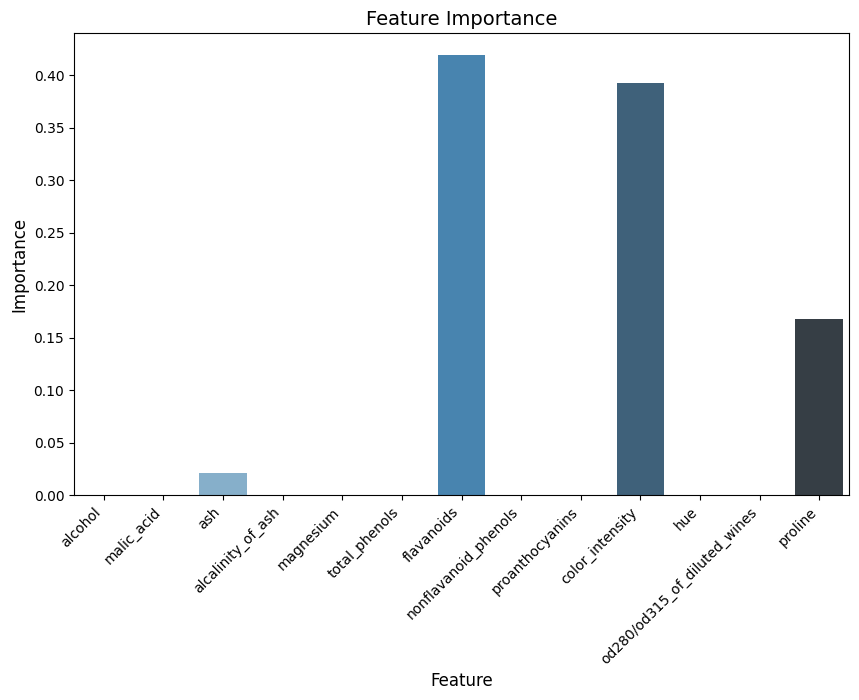

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Decision Tree 모델 생성
dt_clf = DecisionTreeClassifier(random_state=42)

# 2. 하이퍼파라미터 그리드 설정
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 5],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 3. GridSearchCV 수행 (cv=5, scoring='accuracy')
grid_cv = GridSearchCV(dt_clf, param_grid=params, cv=5, scoring='accuracy')
grid_cv.fit(X_train, y_train)

# 4. 최적 파라미터 및 최고 정확도 출력
print(f"Best Hyper-parameters:{grid_cv.best_params_}")
print(f"Best score: {grid_cv.best_score_}")

# 5. 최적 모델로 테스트 세트 평가
best_dt = grid_cv.best_estimator_
test_acc = best_dt.score(X_test, y_test)

# 6. Feature Importance 시각화
plt.figure(figsize=(10, 6))
importance = pd.Series(best_dt.feature_importances_, index=X_train.columns)
sns.barplot(x=importance.index, y=importance.values, palette='Blues_d')

plt.title('Feature Importance', fontsize=14)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.xticks(rotation=45, ha='right')  
plt.show()

---
- **A_brach에서 이루어질 작업**

- A 작업자는 **DecisionTreeClassifier**을 사용한 모델링을 수행합니다.
    - 데이터는 위에서 작업한 데이터를 사용합니다.
    - GridSearch를 활용해 하이퍼파라미터 튜닝을 수행합니다.
    - cv=5을 적용하여 최적의 하이퍼파라미터 조합을 찾습니다.
    - 하이퍼 파라미터 튜닝 과정에서 모델 평가 기준은 **Accuracy**로 합니다.
    - 최적의 하이퍼파라미터 조합을 찾은 후, **Feature Importance**를 시각화하여 모델이 어떤 변수를 중요하게 사용했는지 확인합니다.

- 하이퍼파라미터 후보는 아래와 같습니다.
    - criterion: ['gini', 'entropy']
    - max_depth: [2, 5]
    - min_samples_split: [2,10]
    - min_samples_leaf: [1, 2, 4]

---
- **B_branch에서 이루어질 작업**

- A 작업자와 병렬로 작업을 수행합니다.  
 ※ A 작업자의 작업내용을 보지 못하는 상태입니다.

- B 작업자는 **XGBClassifier**을 사용한 모델링을 수행합니다.
    - 데이터는 위에서 작업한 데이터를 사용합니다.
    - GridSearch를 활용해 하이퍼파라미터 튜닝을 수행합니다.
    - cv=5을 적용하여 최적의 하이퍼파라미터 조합을 찾습니다.
    - 모델의 성능 평가는 **Accuracy**를 기준으로 판단합니다.

 - **하이퍼파라미터 후보**  
    - max_depth: [3, 5, 7, 9, 15] 
    - learning_rate: [0.1, 0.01, 0.001]
    - n_estimators: [50, 100, 200, 300]
    - 최적의 하이퍼파라미터 조합을 찾은 후, **Feature Importance**를 시각화하여 모델이 어떤 변수를 중요하게 사용했는지 확인합니다.

---
- **B_branch에서 작업을 하는 동안 Admin_branch에서 이루어질 작업**

- DecisionTreeClassifier 모델에 대한 Admin_branch 작업
- Admin_branch에서 DecisionTreeClassifier에 대한 추가 작업을 수행합니다.
- A 작업자 작업수행 이후, B 작업자가 작업을 수행하는 동안 Admin_Branch에서 A 작업자 DecisionTreeClassifier 모델의 하이퍼 파라미터값을 조정합니다.
- "최대 깊이" 하이퍼 파라미터 후보 리스트를 [2,3,4,5], "노드 분할 최소 샘플 수' 후보 리스트를 [2, 5, 10]으로 변경합니다.

---
- **Tester_brach에서 이루어질 작업**

- 위에서 만든 DT, XGB 모델에 대한 성능 비교 테스트를 수행합니다.
- 출력 결과는 Test_Result.ipynb 파일을 만들고 해당 파일에 기록합니다.